# Linear Regression using tf.train

In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image
%matplotlib inline

### Developing a simple model with low-level TensorFlow API

In [3]:
#CellStrat - Lets use TF to implement OLS or ordinary least squares regression.
#We use a toy dataset with 10 training samples.

In [4]:
import tensorflow as tf
import numpy as np
 
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3, 
                    6.6, 7.4, 8.0, 
                    9.0])


In [5]:
#CellStrat - the following block of code sets up the regression model in the class TfLinreg

In [6]:
class TfLinreg(object):
    
    def __init__(self, x_dim, learning_rate=0.01,
                 random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        ## build the model
        with self.g.as_default():
            ## set graph-level random-seed
            tf.set_random_seed(random_seed)
            
            self.build()
            ## create initializer
            self.init_op = tf.global_variables_initializer()
        
    def build(self):
        ## define placeholders for inputs
        self.X = tf.placeholder(dtype=tf.float32,
                                shape=(None, self.x_dim),
                                name='x_input')
        self.y = tf.placeholder(dtype=tf.float32,
                                shape=(None),
                                name='y_input')
        print(self.X)
        print(self.y)
        ## define weight matrix and bias vector
        w = tf.Variable(tf.zeros(shape=(1)),
                        name='weight')
        b = tf.Variable(tf.zeros(shape=(1)), 
                        name="bias")
        print(w)
        print(b)

        self.z_net = tf.squeeze(w*self.X + b,
                                name='z_net')
        print(self.z_net)
        
        sqr_errors = tf.square(self.y - self.z_net, 
                               name='sqr_errors')
        print(sqr_errors)
        self.mean_cost = tf.reduce_mean(sqr_errors,
                                        name='mean_cost')
        
        optimizer = tf.train.GradientDescentOptimizer(
                    learning_rate=self.learning_rate, 
                    name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)

In [7]:
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [8]:
#CellStrat - Now set up a training function to train the model.

In [9]:
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    ## initialiaze all variables: W & b
    sess.run(model.init_op)
    
    training_costs = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost], 
                           feed_dict={model.X:X_train, 
                                      model.y:y_train})
        training_costs.append(cost)
        
    return training_costs

In [10]:
#CellStrat - now set up a TensorFlow session to run the model training.

In [11]:
sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

In [12]:
#CellStrat - Let's also visualize the training cost for 10 epochs.

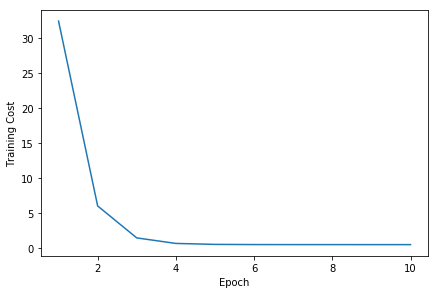

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
#plt.savefig('images/13_01.png', dpi=300)
plt.show()

In [14]:
#CellStrat - as seen the model converges quickly only after a few epochs.

In [15]:
#CellStrat - now define a function to predict using the trained model and based on input features

In [16]:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, 
                      feed_dict={model.X:X_test})
    return y_pred

In [17]:
#CellStrat - lets plot the line fitment.

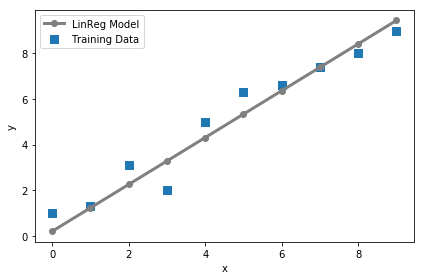

In [18]:
plt.scatter(X_train, y_train,
            marker='s', s=50,
            label='Training Data')
plt.plot(range(X_train.shape[0]), 
         predict_linreg(sess, lrmodel, X_train),
         color='gray', marker='o', 
         markersize=6, linewidth=3,
         label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
#plt.savefig('images/13_02.png')
plt.show()